In [2]:
# IMPORTING LOCAL MODULES
import importlib
import form_pred
import ball_movement
import get_data
import def_clean
import TrainTestNFL

# REFRESHING LOCAL CHANGES
importlib.reload(get_data)
importlib.reload(form_pred)
importlib.reload(def_clean)
importlib.reload(ball_movement)
importlib.reload(TrainTestNFL)

# IMPORTING LOCAL PACKAGES
from get_data import get_assets, get_positional_data
from form_pred import clean_positional
from ball_movement import ball_quadrants, make_quad_chart
from def_clean import DefensiveCleaning
from TrainTestNFL import TrainTestNFL

# IMPORTS
import pandas as pd
import numpy as np

In [3]:
# GET DATA
get_assets()
positions = get_positional_data()

assets previously downloaded
positional data already downloaded.
reading positional data.
returning positional data.


In [4]:
quads = ball_quadrants(positions,4)
offense = clean_positional(positions)

try:
    defense = pd.read_csv('assets/def_clean_output.csv').reset_index()
    if 2018123015 not in defense['gameId'].to_list():
        print('missing full 17 week dataset')
        print('getting dataset now.')
        raise LookupError
except:
    def_cleaning = DefensiveCleaning(n_cuts=11)
    defense = def_cleaning.generate_full_df(1, 17).reset_index()

'''
d_test = pd.read_csv('assets/def_clean_output_test.csv')
d_train = pd.read_csv('assets/def_clean_output.csv')
d_train_clust = pd.read_csv('assets/def_clust_output.csv').drop(columns=['Unnamed: 0','Cluster'])
d_train = d_train.merge(d_train_clust, on=['gameId','playId'])
'''

..............................initializing
positional data already downloaded.
reading positional data.
returning positional data.
..data downloaded...
...Week 1 loaded...
...filtered...
...transformed...
...time reduced...
...starting dataframe generated...
...action type generated...
.....Week 1 COMPLETE.....

   5.88% COMPLETE   

--- 0.5 minutes elapsed ---

the weeks complete:  [1]
...Week 2 loaded...
...filtered...
...transformed...
...time reduced...
...starting dataframe generated...
...action type generated...
.....Week 2 COMPLETE.....

   11.76% COMPLETE   

--- 1.0 minutes elapsed ---

the weeks complete:  [1 2]
...Week 3 loaded...
...filtered...
...transformed...
...time reduced...
...starting dataframe generated...
...action type generated...
.....Week 3 COMPLETE.....

   17.65% COMPLETE   

--- 1.6 minutes elapsed ---

the weeks complete:  [1 2 3]
...Week 4 loaded...
...filtered...
...transformed...
...time reduced...
...starting dataframe generated...
...action type gene

"\nd_test = pd.read_csv('assets/def_clean_output_test.csv')\nd_train = pd.read_csv('assets/def_clean_output.csv')\nd_train_clust = pd.read_csv('assets/def_clust_output.csv').drop(columns=['Unnamed: 0','Cluster'])\nd_train = d_train.merge(d_train_clust, on=['gameId','playId'])\n"

In [5]:
a = TrainTestNFL(offense,defense,quads)
X_train, X_test, y_train, y_test = a.split(1, 14)

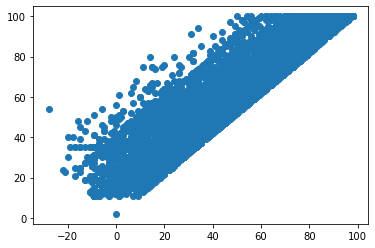

In [7]:
import matplotlib.pyplot as plt

plt.scatter(X_train['yardline_100_dir'].add(X_train['yardsToGo']).values, X_train['yardline_first_dir'].values)

In [ ]:
X_train['yardline_first']

In [ ]:
X_train['yardline_100_dir']

In [18]:
plays = pd.read_csv('Kaggle-Data-Files/plays.csv')
plays['yardsToGo']

0        15
1        10
2        10
3        10
4         1
         ..
19234     5
19235     7
19236     4
19237     1
19238    10
Name: yardsToGo, Length: 19239, dtype: int64

In [33]:
from play_vis import create_full_chart

create_full_chart(positions, 2018090600, 190)

Play description: (Shotgun) M.Ryan pass deep left to J.Jones to PHI 6 for 33 yards (R.Darby).


alt.LayerChart(...)

In [26]:
positions[(positions['gameId'] == 2019090600) & (positions['playId'] == 320)]

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route,week


In [21]:
X_train['yardline_100_dir']

0        20.0
1        61.0
2        61.0
3        61.0
4        99.0
         ... 
13915    65.0
13916    65.0
13917    77.0
13918    77.0
13919    94.0
Name: yardline_100_dir, Length: 13920, dtype: float64

In [23]:
train['yardsToGo'] = train['yardline_100'] - train['yardline_first'] 


In [25]:
for c in train.columns:
    if "down" in c:

        print(c)

In [15]:
action_cols = []
for c in train.columns:
    if "_act" in c:
        action_cols.append(c)

        print(c)

CBL0_act
CBL1_act
CBL2_act
CBL3_act
CBR0_act
CBR1_act
CBR2_act
CBR3_act
DBL0_act
DBL1_act
DBL2_act
DBR0_act
DBR1_act
DBR2_act
DEL0_act
DER0_act
DLL0_act
DLR0_act
DTL0_act
DTR0_act
FSL0_act
FSL1_act
FSL2_act
FSR0_act
FSR1_act
FSR2_act
ILBL0_act
ILBL1_act
ILBL2_act
ILBR0_act
ILBR1_act
ILBR2_act
ILBR3_act
ILBR4_act
KL0_act
KR0_act
LBL0_act
LBL1_act
LBL2_act
LBR0_act
LBR1_act
LBR2_act
LSL0_act
LSR0_act
MLBL0_act
MLBL1_act
MLBR0_act
MLBR1_act
NTL0_act
NTR0_act
OLBL0_act
OLBL1_act
OLBL2_act
OLBL3_act
OLBL4_act
OLBR0_act
OLBR1_act
OLBR2_act
OLBR3_act
PL0_act
PR0_act
SL0_act
SL1_act
SR0_act
SR1_act
SSL0_act
SSL1_act
SSL2_act
SSR0_act
SSR1_act
SSR2_act
DBL3_act
MLBR2_act


In [55]:
y = pd.DataFrame()

In [63]:
a = TrainTestNFL(positions,d_train,y)
a.split()

Unable to Split: ['ball placement (y)']
No Week or gameId to split!


ValueError: The following dataframes don't have a week or gameId field: ['ball placement (y)']

In [80]:
dummy_model = pd.get_dummies(model)

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
model_scaled = scaler.fit_transform(dummy_model.fillna(0))
model_scaled = model_scaled

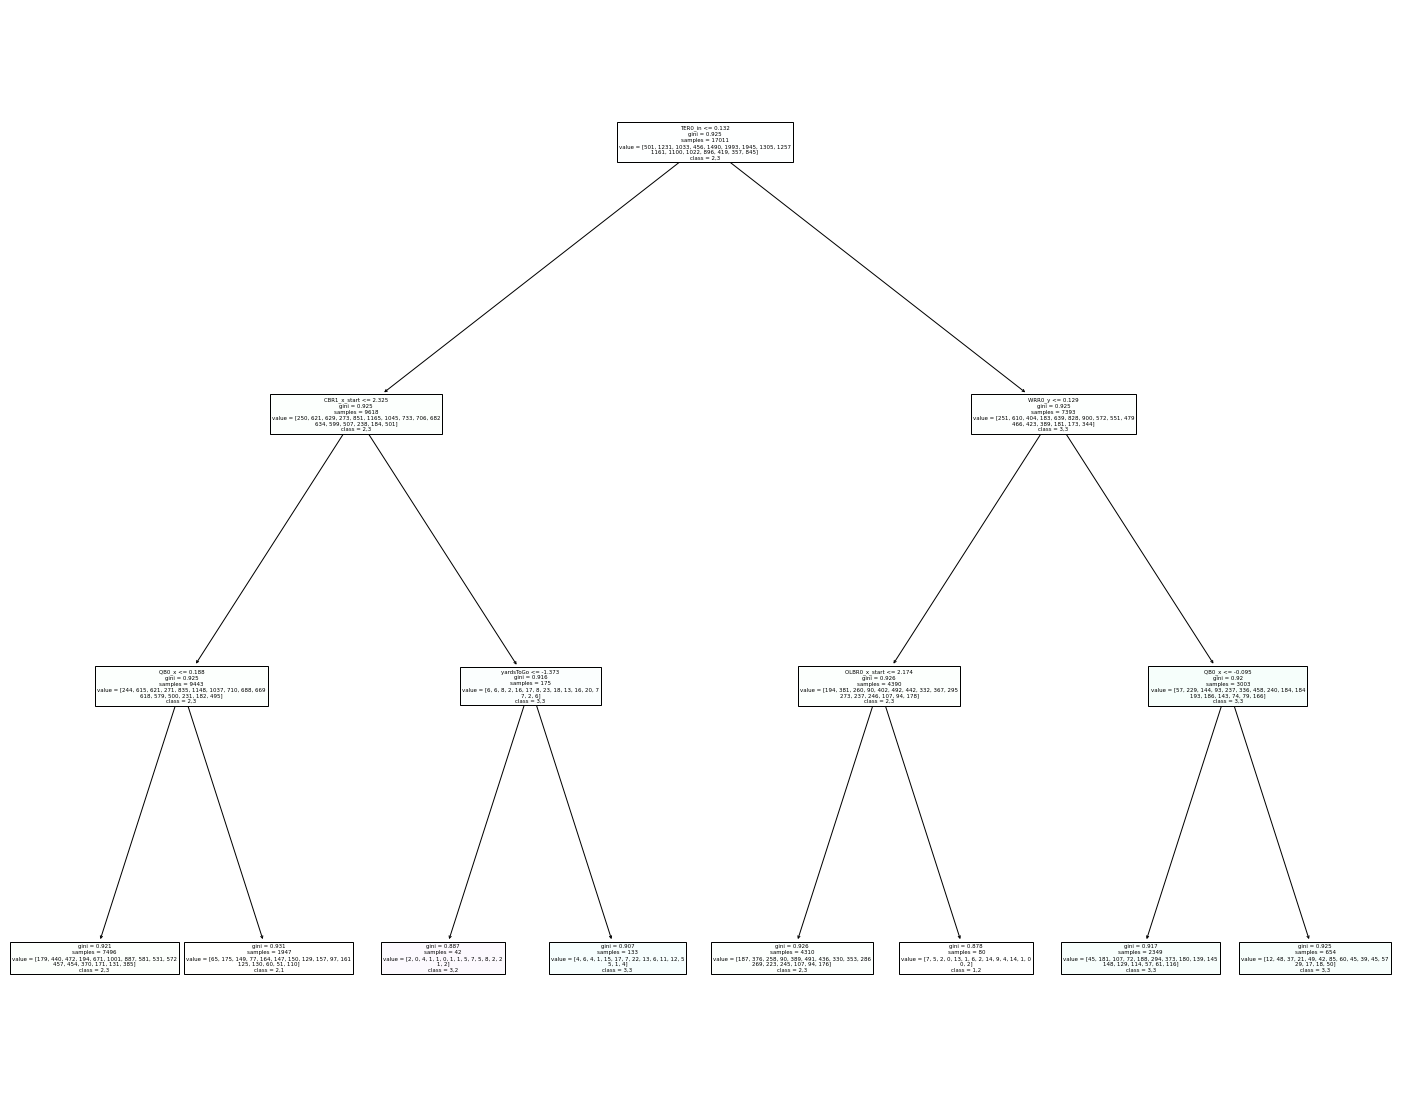

In [90]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree


clf = DecisionTreeClassifier(max_depth= 3, max_features = "log2")
clf = clf.fit(model_scaled, y['class'])

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=dummy_model.columns,  
                   class_names=y['class'],
                   filled=True)

In [76]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(model_scaled, y)

ValueError: y should be a 1d array, got an array of shape (17011, 2) instead.